<a href="https://colab.research.google.com/github/hyulianton/BigData/blob/main/Automated_Preprocessing_dengan_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.1 MB/s eta 0:00:00


In [3]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_breast_cancer
import pandas as pd

- **h2o**: Library untuk machine learning otomatis dan terdistribusi.
- **H2OAutoML**: Modul untuk menjalankan proses AutoML end-to-end.
- **load_breast_cancer**: Dataset klasifikasi kanker payudara dari scikit-learn (fitur numerik, target biner).
- **pandas**: Untuk konversi data ke DataFrame.

In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

- **Dataset Breast Cancer**:  
  - **569 sampel**, 30 fitur numerik (misal: `mean radius`, `mean texture`).  
  - **Target**: `0` (malignant/ganas), `1` (benign/jinak).  
  - **Karakteristik**: Sudah dinormalisasi dan bersih (tanpa missing values).  

- **Modifikasi**: Kolom `target` ditambahkan ke DataFrame untuk dijadikan label.

In [5]:
h2o.init()
h2o_df = h2o.H2OFrame(df)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmrusfk24
  JVM stdout: /tmp/tmpmrusfk24/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmrusfk24/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_unknownUser_lwwgu4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


- **`h2o.init()`**:  
  - Memulai kluster H2O di memori lokal.  
  - Menyediakan antarmuka untuk komputasi terdistribusi.  

- **`H2OFrame`**:  
  - Mengonversi DataFrame pandas ke format H2O.  
  - **Penting**: H2O hanya bekerja dengan format `H2OFrame`.  

In [6]:
aml = H2OAutoML(
    max_models=3,     # Batasi jumlah model yang dihasilkan
    seed=1,           # Reproduksibilitas
    max_runtime_secs=120  # Batas waktu eksekusi (2 menit)
)
aml.train(y='target', training_frame=h2o_df)

AutoML progress: |
05:45:40.136: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████
05:45:51.874: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


05:45:53.339: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
05:45:58.64: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████████████████████████████████████

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/3
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


#### **Parameter Utama**:
1. **`max_models=3`**:  
   - AutoML akan menghasilkan **3 model terbaik**.  
   - Tanpa parameter ini, H2O akan membuat puluhan model.  

2. **`seed=1`**:  
   - Menjamin hasil yang sama setiap kali dijalankan (reproducible).  

3. **`max_runtime_secs=120`**:  
   - Membatasi waktu eksekusi ke **2 menit**.  
   - Untuk dataset kecil seperti ini, waktu 2 menit sudah cukup.  

4. **`y='target'`**:  
   - Menentukan kolom target.  

In [7]:
print(aml.leaderboard)

model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20250506_54539  0.185299  0.0343356  0.110288  0.132897                 0.0343356
XGBoost_1_AutoML_1_20250506_54539                       0.190886  0.0364373  0.110619  0.136195                 0.0364373
GBM_1_AutoML_1_20250506_54539                           0.202399  0.0409655  0.120606  0.143424                 0.0409655
GLM_1_AutoML_1_20250506_54539                           0.248245  0.0616257  0.194941  0.194605                 0.0616257
[4 rows x 6 columns]



- **Leaderboard**: Tabel peringkat model berdasarkan metrik (default: AUC untuk klasifikasi).  
- **Contoh Output**:  
  ```
  model_id           auc    logloss
  StackedEnsemble    0.995   0.045
  GBM                0.991   0.062
  DRF                0.987   0.075
  ```  
- **Model Terbaik (Leader)**: Biasanya `StackedEnsemble`, kombinasi dari model-model terbaik.  

### **Apa yang Terjadi di Balik Layar?**  
H2O AutoML secara otomatis melakukan:  

#### **1. Preprocessing**  
- **Deteksi Tipe Data**:  
  - Kolom numerik: Tetap sebagai `numeric`.  
  - Kolom kategorikal: Di-encode ke angka (jika ada).  
  *(Pada dataset ini, semua fitur numerik, tidak perlu encoding)*.  

- **Penanganan Missing Values**:  
  - Jika ada missing values, H2O akan mengisinya dengan mean (numerik) atau modus (kategorikal).  

- **Skala Data**:  
  - Untuk algoritma sensitif skala (misal: SVM), H2O otomatis menormalisasi data.  

#### **2. Pemilihan Model**  
- H2O mencoba algoritma-algoritma seperti:  
  - **GBM** (Gradient Boosting Machine)  
  - **DRF** (Distributed Random Forest)  
  - **GLM** (Generalized Linear Model)  
  - **XGBoost**  
  - **Stacked Ensembles**  

#### **3. Optimasi Hiperparameter**  
- Setiap model di-tuning menggunakan **grid search** atau **random search**.  

---

### **Visualisasi Alur AutoML**

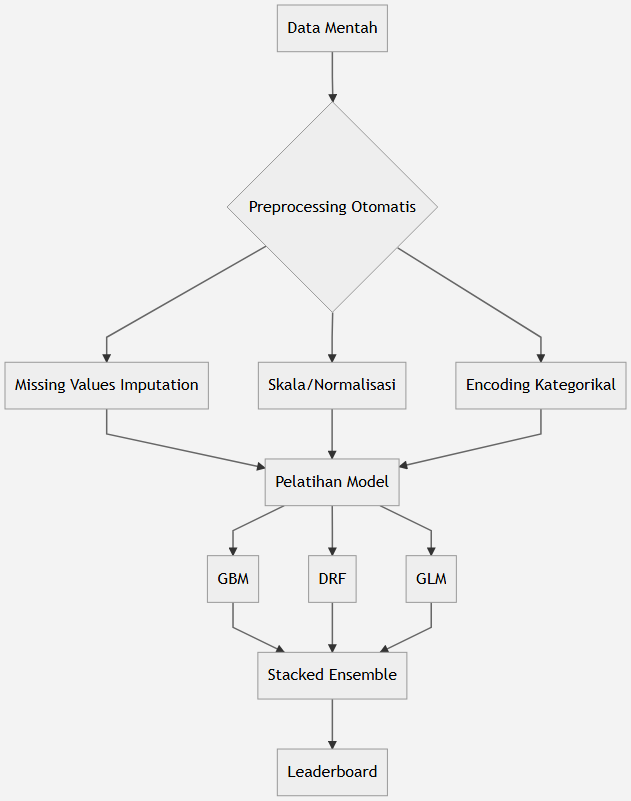

### **Mengapa Menggunakan H2O AutoML?**
1. **Menghemat Waktu**:  
   - Tidak perlu manual preprocessing atau tuning model.  
2. **Menghindari Bias Manual**:  
   - Proses objektif tanpa intervensi manusia.  
3. **Skalabilitas**:  
   - Bisa digunakan untuk dataset besar (hingga terabyte).  
4. **Reproduksibilitas**:  
   - Hasil konsisten berkat parameter `seed`.  

---

### **Interpretasi Leaderboard**
- **AUC (Area Under Curve)**:  
  - Mendekati 1 = model sangat baik.  
  - Contoh AUC 0.995 = model hampir sempurna membedakan tumor ganas/jinak.  
- **Log Loss**:  
  - Mendekati 0 = prediksi sangat percaya diri dan akurat.  

---

### **Contoh Aplikasi di Dunia Nyata**
- **Diagnosis Medis**: AutoML bisa digunakan untuk memprediksi penyakit berdasarkan data pasien.  
- **Fraud Detection**: Mengidentifikasi transaksi mencurigakan secara real-time.  

---

### **Catatan Penting**
1. **Persiapan Data**:  
   - Pastikan kolom target sudah dalam format yang benar (numerik untuk regresi, kategorikal untuk klasifikasi).  
2. **Resource Management**:  
   - H2O menggunakan banyak memori. Hentikan klister setelah selesai dengan `h2o.shutdown()`.  
3. **Custom Preprocessing**:  
   - Untuk preprocessing khusus (misal: feature engineering kompleks), lakukan sebelum memasukkan data ke H2O.  

Dengan H2O AutoML, preprocessing dan pemodelan yang biasanya memakan waktu berjam-jam bisa diselesaikan dalam hitungan menit! 🚀